In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d pavansanagapati/images-dataset

Dataset URL: https://www.kaggle.com/datasets/pavansanagapati/images-dataset
License(s): CC0-1.0
100% 1.01G/1.01G [01:02<00:00, 16.2MB/s]
100% 1.01G/1.01G [01:02<00:00, 17.3MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/images-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator

In [8]:
dataset_dir = '/content/data/data'

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

X_train,y_train = train_generator.next()
X_val,y_val = validation_generator.next()
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

Found 1444 images belonging to 7 classes.
Found 359 images belonging to 7 classes.
(32, 224, 224, 3)
(32, 7)
(32, 224, 224, 3)
(32, 7)


In [12]:
class_names = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']
def show_image(image, label):
    plt.imshow(image)
    plt.title(class_names[np.argmax(label)])
    plt.axis('off')
    plt.show()

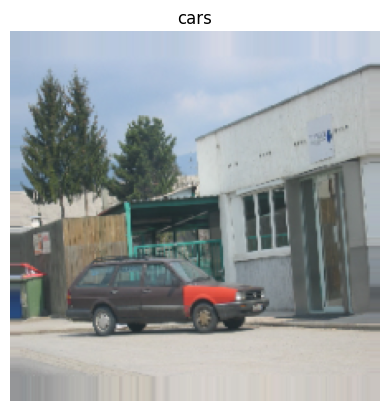

In [18]:
import random
idx = random.randint(0, len(X_train))
show_image(X_train[idx], y_train[idx])

# Model Architecture

In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(train_generator,epochs=20,validation_data=validation_generator)

Epoch 1/20
46/46 [==============================] - 27s 485ms/step - loss: 1.7229 - accuracy: 0.3497 - val_loss: 1.7177 - val_accuracy: 0.3259
Epoch 2/20
46/46 [==============================] - 23s 504ms/step - loss: 1.2284 - accuracy: 0.5630 - val_loss: 1.4483 - val_accuracy: 0.4958
Epoch 3/20
46/46 [==============================] - 22s 473ms/step - loss: 1.1124 - accuracy: 0.6122 - val_loss: 1.4796 - val_accuracy: 0.5265
Epoch 4/20
46/46 [==============================] - 21s 450ms/step - loss: 0.8857 - accuracy: 0.6911 - val_loss: 1.5460 - val_accuracy: 0.5153
Epoch 5/20
46/46 [==============================] - 24s 514ms/step - loss: 0.8035 - accuracy: 0.7237 - val_loss: 1.1727 - val_accuracy: 0.5682
Epoch 6/20
46/46 [==============================] - 21s 453ms/step - loss: 0.7191 - accuracy: 0.7424 - val_loss: 0.9526 - val_accuracy: 0.6323
Epoch 7/20
46/46 [==============================] - 23s 500ms/step - loss: 0.7159 - accuracy: 0.7458 - val_loss: 1.1627 - val_accuracy: 0.5627

# Check Loss and Accuracy

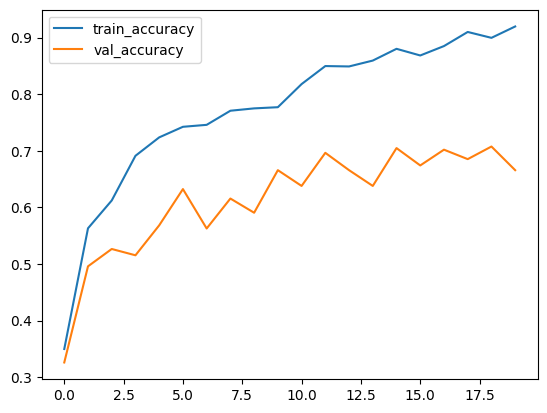

In [27]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

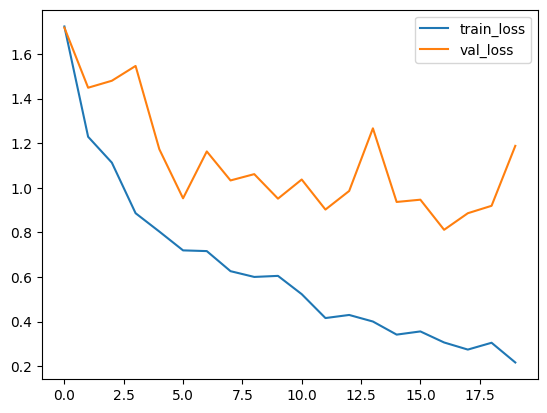

In [28]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Generate predictions
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

12/12 [==============================] - 9s 716ms/step
              precision    recall  f1-score   support

        bike       0.37      0.10      0.15        73
        cars       0.22      0.36      0.27        84
        cats       0.09      0.10      0.09        40
        dogs       0.11      0.15      0.13        40
     flowers       0.15      0.14      0.14        42
      horses       0.15      0.12      0.14        40
       human       0.06      0.05      0.06        40

    accuracy                           0.17       359
   macro avg       0.16      0.15      0.14       359
weighted avg       0.19      0.17      0.16       359



In [36]:
from PIL import Image
from google.colab import files

In [42]:
def preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.resize((224, 224))  # adjust size if necessary
    img_array = np.array(img)
    img_array = img_array / 255.0  # normalize if necessary
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [55]:
def show_prediction(img_path):
    img_array = preprocess_image(img_path)
    plt.imshow(img_array[0])
    plt.axis('off')
    plt.show()

    predictions = model.predict(img_array)
    print(f"probability : {predictions}")
    predicted_class = np.argmax(predictions, axis=1)

    print(f"Prediction: {class_names[predicted_class[0]]}")

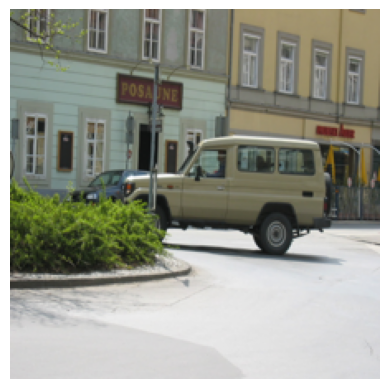

1/1 [==============================] - 0s 89ms/step
probability : [[2.2263330e-04 9.9553925e-01 1.8347814e-07 1.3151152e-05 4.4047665e-11
  4.2091939e-03 1.5629716e-05]]
Prediction: cars


In [57]:
filename = '/content/data/data/cars/carsgraz_288.bmp'
show_prediction(filename)

# Additional Challenge: Data Augmentation and Fine-Tuning a Pre-trained

In [59]:
from keras.applications.vgg16 import VGG16

In [60]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [61]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [62]:
new_model = Sequential()
new_model.add(base_model)
new_model.add(Flatten())
new_model.add(Dense(256, activation='relu'))
new_model.add(Dense(7, activation='softmax'))

In [63]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dense_5 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 21139271 (80.64 MB)
Trainable params: 21139271 (80.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
for layer in base_model.layers:
    layer.trainable = False

In [65]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               6422784   
                                                                 
 dense_5 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 21139271 (80.64 MB)
Trainable params: 6424583 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [66]:
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
history = new_model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
46/46 [==============================] - 24s 509ms/step - loss: 0.1067 - accuracy: 0.9640 - val_loss: 0.5152 - val_accuracy: 0.8384
Epoch 2/10
46/46 [==============================] - 24s 522ms/step - loss: 0.0834 - accuracy: 0.9681 - val_loss: 0.4882 - val_accuracy: 0.8468
Epoch 3/10
46/46 [==============================] - 28s 609ms/step - loss: 0.0534 - accuracy: 0.9834 - val_loss: 0.2877 - val_accuracy: 0.9081
Epoch 4/10
46/46 [==============================] - 23s 511ms/step - loss: 0.0613 - accuracy: 0.9827 - val_loss: 0.2492 - val_accuracy: 0.9136
Epoch 5/10
46/46 [==============================] - 23s 506ms/step - loss: 0.0341 - accuracy: 0.9868 - val_loss: 0.2535 - val_accuracy: 0.9304
Epoch 6/10
46/46 [==============================] - 23s 500ms/step - loss: 0.0159 - accuracy: 0.9965 - val_loss: 0.3946 - val_accuracy: 0.8914
Epoch 7/10
46/46 [==============================] - 23s 497ms/step - loss: 0.0158 - accuracy: 0.9945 - val_loss: 0.2922 - val_accuracy: 0.9053

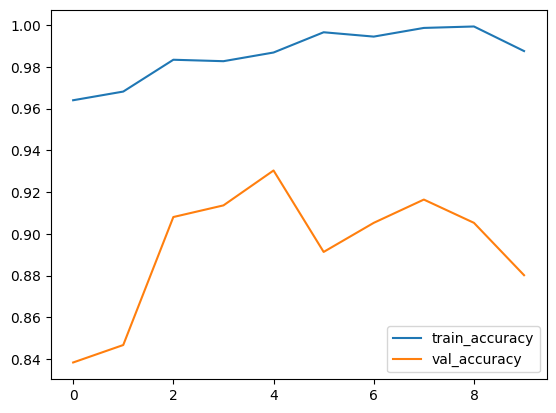

In [69]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

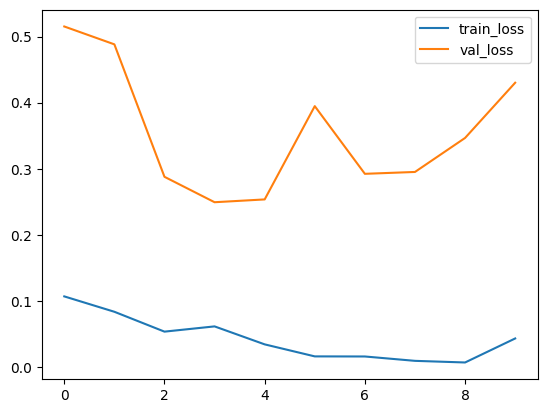

In [70]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Functions to display the image and the prediction

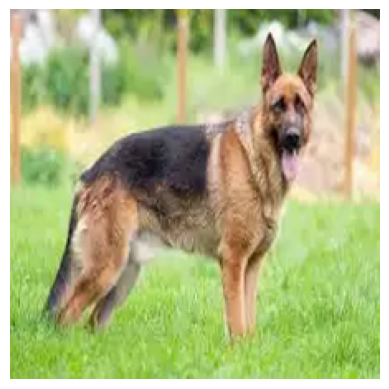

1/1 [==============================] - 0s 47ms/step
Prediction: dogs


In [79]:
def preprocess_image(img_path):
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def show_prediction(img_path):
    img_array = preprocess_image(img_path)
    plt.imshow(img_array[0])
    plt.axis('off')
    plt.show()

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    print(f"Prediction: {class_names[predicted_class[0]]}")



filename = '/content/download.webp'
show_prediction(filename)

# Generate predictions

In [80]:
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

12/12 [==============================] - 5s 390ms/step
              precision    recall  f1-score   support

        bike       0.11      0.03      0.04        73
        cars       0.26      0.40      0.31        84
        cats       0.11      0.15      0.13        40
        dogs       0.12      0.12      0.12        40
     flowers       0.03      0.02      0.02        42
      horses       0.22      0.20      0.21        40
       human       0.09      0.07      0.08        40

    accuracy                           0.16       359
   macro avg       0.13      0.14      0.13       359
weighted avg       0.14      0.16      0.14       359



# Model Evaluation on train & Validation data

In [81]:
new_model.evaluate(train_generator)

46/46 [==============================] - 24s 514ms/step - loss: 0.0129 - accuracy: 0.9958


[0.012895116582512856, 0.9958449006080627]

In [82]:
new_model.evaluate(validation_generator)

12/12 [==============================] - 7s 575ms/step - loss: 0.3627 - accuracy: 0.9053


[0.3627421259880066, 0.9052924513816833]